DRIVE LINK
https://drive.google.com/drive/folders/1zcCamH5t15CIaMszr9vnpT0_7OEI7mt5?usp=sharing

In [1]:
# to suppress warnings

import warnings   
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Reading and Inspecting the Data

In [3]:
application = pd.read_csv('application_data.csv')
prev_application = pd.read_csv('previous_application.csv')


In [4]:
col_description = pd.read_csv('columns_description.csv', encoding = 'ISO-8859-1')
col_description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


## 1.2 Understanding the data

In [5]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
application.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [7]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
application.shape

(307511, 122)

In [9]:
application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [10]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [11]:
application.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

### Previous Application Data

In [12]:
prev_application = pd.read_csv('previous_application.csv')

In [13]:
prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
prev_application.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [15]:
prev_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [16]:
prev_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [17]:
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

# 2. DATA CLEANING AND MANIPULATION

## 2.1 Inspecting the missing data
Here, we will proceed in the following manner:

1. Check the missing values in all columns of Dataframe.
2. Checking the columns with missing values equal to or more than 50%.
3. Drop the columns having missing values equal to or more than 50%.

In [18]:
#creating a function to find null values for the dataframe
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)
    

In [19]:
null_values(application)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_HOUSING_TYPE            0.00
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [20]:
null_col_50 = null_values(application)[null_values(application)>50]

In [21]:
print(null_col_50)
print()
print("Num of columns having missing values more than 50% :",len(null_col_50))

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
NONLIVINGAREA_AVG           55.18
NONLIVINGAREA_MEDI          55.18
ELEVATORS_MEDI              53.30
ELEVATORS_AVG               53.30
ELEVATORS_MODE

<b>INSIGHT</b>

* There are 41 columns having null values more than 50% which are related to different area sizes on apartment owned/rented by the loan applicant

In [22]:
null_col_50.index  # Will drop all these columns

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE'],
      dtype='object')

In [23]:
# Now lets drop all the columns having missing values more than 50% that is 41 columns

application.drop(columns = null_col_50.index, inplace = True)

In [24]:
application.shape  # Now there are 81 columns remaining

(307511, 81)

## 2.1.2 Dealing with null values more than 15%

In [25]:
# now we will deal with null values more than 15% 

null_col_15 = null_values(application)[null_values(application)>15]
null_col_15

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
dtype: float64

* from the columns dictionary we can conclude that only 'OCCUPATION_TYPE', 'EXT_SOURCE_3 looks relevant to TARGET column.thus dropping all other columns except 'OCCUPATION_TYPE','EXT_SOURCE_3

In [26]:
#removing 'OCCUPATION_TYPE', 'EXT_SOURCE_3' from "null_col_15" so that we can drop all other at once.

null_col_15.drop(["OCCUPATION_TYPE","EXT_SOURCE_3"], inplace = True)

In [27]:
null_col_15

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
dtype: float64

In [28]:
print("No of columns having missing values more than 15% and are not reletable:",len(null_col_15))

No of columns having missing values more than 15% and are not reletable: 8


In [29]:
#thus removing columns having missing values more than 15% and which are not reletable to TARGET column.

application.drop(null_col_15.index,axis=1, inplace = True)

In [30]:
application.shape  # After dropping null_col_15, we have left with 73 columns

(307511, 73)

* After after dropping 8 columns we are left with 73 columns.
* There are 2 more Columns with missing values more than 15%

In [31]:
null_values(application).head(10)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

## 2.2 Analyse & Removing Unneccsary Columns

### 2.2.1 Starting with EXT_SOURCE_3 , EXT_SOURCE_2. As they have normalised values, now we will understand the relation between these columns with TARGET column using a heatmap

In [32]:
irrev = ["EXT_SOURCE_3","EXT_SOURCE_2"]  # putting irrevlent columns in varibale "irrev"


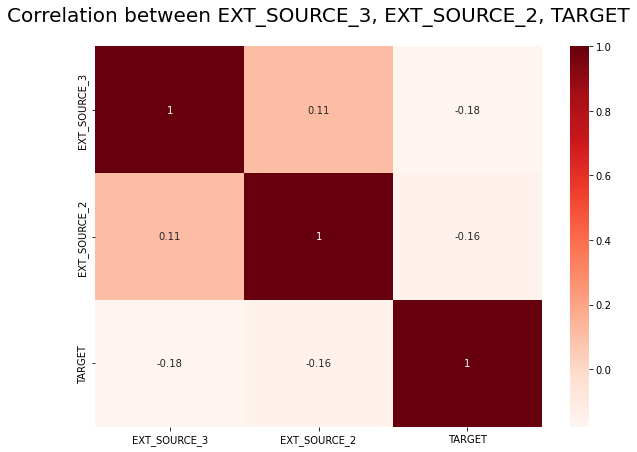

In [33]:
plt.figure(figsize= [10,7])

sns.heatmap(application[irrev+["TARGET"]].corr(), cmap="Reds",annot=True)

plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict={"fontsize":20}, pad=25)
plt.show()

* There seems to be no linear correlation and also from columns description we decided to remove these columns.
* Also we are aware correation doesn't cause causation

In [34]:
#dropping above columns

application.drop(irrev, axis=1, inplace= True)

application.shape  # Now we are left with 71 columns


(307511, 71)

In [35]:
null_values(application).head(10)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

### 2.2.2 Now we will check columns with FLAGS and their relation with TARGET columns to remove irrelevant ones

* For this we will create a dataframe containig all FLAG columns and then plot bar graphs for each column with respect to TARGET column for which "0" will represent as Repayer and "1" will represent as Defaulter

In [36]:
flag_columns = [col for col in application.columns if "FLAG" in col]

flag_columns  # Viewing all FLAG columns

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [37]:
flag_df = application[flag_columns+["TARGET"]]

In [38]:
# replacing "0" as repayer and "1" as defaulter for TARGET column

flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

In [39]:
# as stated in columnn description replacing "1" as Y being TRUE and "0" as N being False

for i in flag_df:
    if i!= "TARGET":
        flag_df[i] = flag_df[i].replace({1:"Y", 0:"N"})

In [40]:
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,Defaulter
1,N,N,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,Repayer
2,Y,Y,Y,Y,Y,Y,Y,N,N,N,...,N,N,N,N,N,N,N,N,N,Repayer
3,N,Y,Y,Y,N,Y,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,Repayer
4,N,Y,Y,Y,N,Y,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Repayer


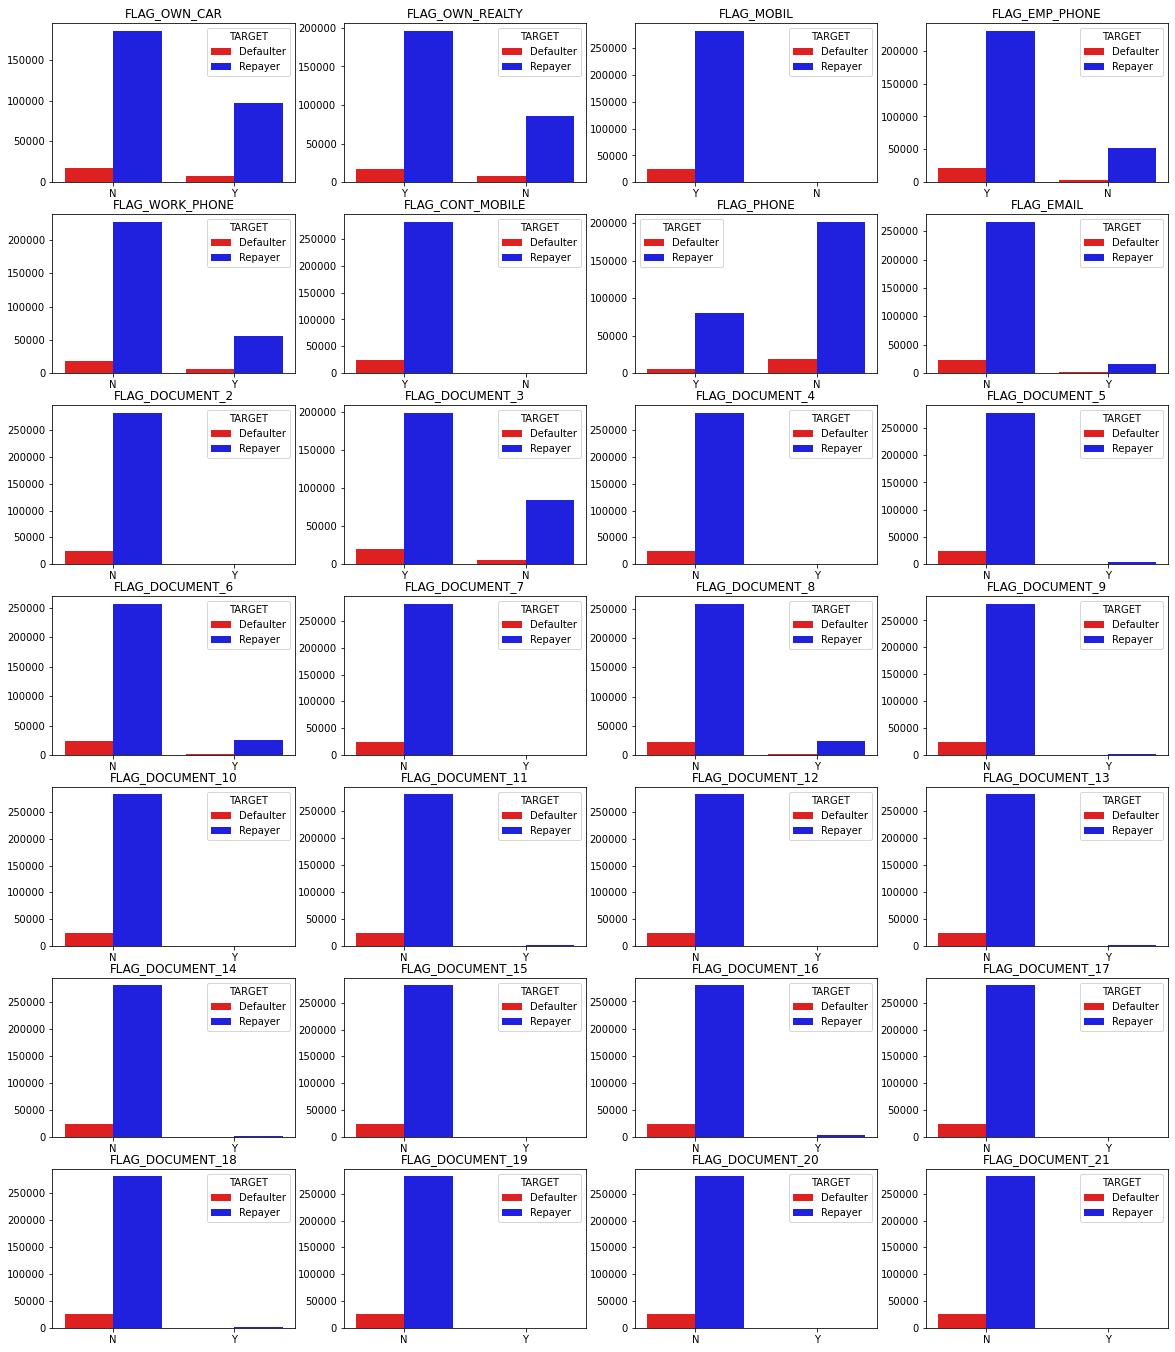

In [41]:
import itertools # using itertools for efficient looping plotting subplots

# Plotting all the graph to find the relation and evaluting for dropping such columns

plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag_columns,range(len(flag_columns))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(flag_df[i], hue = flag_df["TARGET"], palette = ["r","b"])
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**INSIGHT**

* Columns (FLAG_OWN_REALTY, FLAG_MOBIL ,FLAG_EMP_PHONE, FLAG_CONT_MOBILE, FLAG_DOCUMENT_3) have more repayers than defaulter and from these keeping FLAG_DOCUMENT_3,FLAG_OWN_REALTY, FLAG_MOBIL more sense  thus we can include these columns and remove all other FLAG columns for furhter analysis.**

In [42]:
# removing required columns from "flag_df" such that we can remove the irrelevent columns from "appl_data" dataset.

flag_df.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

In [43]:
len(flag_df.columns)

25

In [44]:
# dropping the columns of "flag_df" dataframe that is removing more 25 columns from "application" dataframe

application.drop(flag_df.columns, axis=1, inplace= True)

In [45]:
application.shape    # Now we are left 46 revelent columns

(307511, 46)

**INSIGHT**

* After removing uneccsarry, irrelevent and missing columns. We are left with 46 columns

# 3. Imputing values
Now that we have removed all the unneccesarry columns, we will proced with imputing values for relevent missing columns whereever required

In [46]:
null_values(application).head(10)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_60_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

**Insight**
* **Now we have only 7 columns which have missing values more than 1%. Thus, we will only impute them for further analysis and such columns are: OCCUPATION_TYPE, AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR**

## 3.1 Imputing for "OCCUPATION_TYPE" column

In [47]:
#Percentage of each category present in "OCCUPATION_TYPE"

application["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

**Insight:**
* **from above it looks like this columnn is categorical one and have missing values of 31.35%. to fix this we will impute another category as "Unknown" for the missing values.**

In [48]:
# imputing null values with "Unknown"

application["OCCUPATION_TYPE"] = application["OCCUPATION_TYPE"].fillna("Unknown")
application["OCCUPATION_TYPE"].isnull().sum() # Now we have zero null values 


0

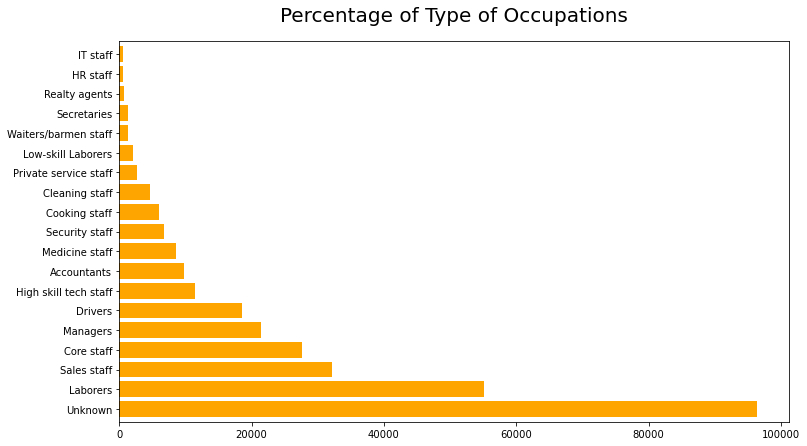

In [49]:
# Plotting a percentage graph having each category of "OCCUPATION_TYPE"

plt.figure(figsize = [12,7])
(application["OCCUPATION_TYPE"].value_counts()).plot.barh(color= "orange",width = .8)
plt.title("Percentage of Type of Occupations", fontdict={"fontsize":20}, pad =20)
plt.show()

* Highest percentage of values belongs to Unknown group and Secons belongs to Laborers

## 3.2 Now let's move to other 6 columns :
AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"

In [50]:
application[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


**These above columns represent number of enquries made for the customer(which should be discrete and not continous).
from above describe results we see that all values are numerical and can conclude that for imputing missing we should not use mean as it is in decimal form, hence for imputing purpose we will use median for all these columns.**

In [51]:
#creating "amt_credit" variable having these columns "AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
#"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"

amt_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]


In [52]:
application.fillna(application[amt_credit].median(),inplace = True)

In [53]:
null_values(application).head(10)

NAME_TYPE_SUITE             0.42
DEF_60_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_30_CNT_SOCIAL_CIRCLE    0.33
AMT_GOODS_PRICE             0.09
AMT_ANNUITY                 0.00
CNT_FAM_MEMBERS             0.00
DAYS_LAST_PHONE_CHANGE      0.00
ORGANIZATION_TYPE           0.00
dtype: float64

* Still there some missing value coloumns but we will not impute them as the missing value count very less.

## 4. Standardising values 

In [54]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,1.405292,0.100049,-962.858788,0.710023,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,2.379803,0.362291,826.808487,0.453752,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,-757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,2.000000,0.000000,-274.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,344.000000,24.000000,0.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**Insights:**

**from above describe result we can see that** 
* **columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE have very high values, thus will make these numerical columns in categorical columns for better understanding.**
* **columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE which counts days have negative values. thus will correct those values**
* **convert DAYS_BIRTH to AGE in years , DAYS_EMPLOYED to YEARS EMPLOYED**

### 4.1 Taking care of columns: AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE

In [55]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount in term of Lakhs
application['AMT_INCOME_TOTAL']=application['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application['AMT_INCOME_RANGE']=pd.cut(application['AMT_INCOME_TOTAL'],bins,labels=slot)

In [56]:
round((application["AMT_INCOME_RANGE"].value_counts(normalize = True)*100),2)

1L-2L        50.73
2L-3L        21.21
0-1L         20.73
3L-4L         4.78
4L-5L         1.74
5L-6L         0.36
6L-7L         0.28
8L-9L         0.10
7L-8L         0.05
9L-10L        0.01
10L Above     0.01
Name: AMT_INCOME_RANGE, dtype: float64

In [57]:
# Creating bins for Credit amount in term of Lakhs
application['AMT_CREDIT']=application['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application['AMT_CREDIT_RANGE']=pd.cut(application['AMT_CREDIT'],bins=bins,labels=slots)

In [58]:
round((application["AMT_CREDIT_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        17.82
10L Above    16.25
5L-6L        11.13
4L-5L        10.42
1L-2L         9.80
3L-4L         8.56
6L-7L         7.82
8L-9L         7.09
7L-8L         6.24
9L-10L        2.90
0-1L          1.95
Name: AMT_CREDIT_RANGE, dtype: float64

### 4.2 Dealing with columns :

**DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE**

In [59]:
# creating "days_col" varibale to store all days columns
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

application[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


* **from describe we get that days are in negative that is not usual, so to correct it we use absolute function as below**

In [60]:
#using abs() function to correct the days values

application[days_col]= abs(application[days_col])

In [61]:
# Data is correct now

application[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


### 4.3. now convert DAYS_BIRTH, DAYS_EMPLOYED columns in terms of Years and binning years for better understanding, that is adding two more categorical column

In [62]:
application["AGE"] = application["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

application["AGE_GROUP"] = pd.cut(application["AGE"], bins=bins, labels=slots)

In [63]:
#creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED"

application["YEARS_EMPLOYED"] = application["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

application["EMPLOYEMENT_YEARS"] = pd.cut(application["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [64]:
application["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: EMPLOYEMENT_YEARS, dtype: float64

## 5. Identifying Outliers

In [65]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979,5.990260,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,962.858788,0.710023,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,43.936973,185.547239
std,102790.175348,0.272419,0.722121,2.371231,4.024908,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,826.808487,0.453752,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,11.956133,382.037676
min,100002.000000,0.000000,0.000000,0.256500,0.450000,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189145.500000,0.000000,0.000000,1.125000,2.700000,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.008219,2.556164
50%,278202.000000,0.000000,0.000000,1.471500,5.135310,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685,6.079452
75%,367142.500000,0.000000,1.000000,2.025000,8.086500,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,1570.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288,15.635616
max,456255.000000,1.000000,19.000000,1170.000000,40.500000,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,4292.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548,1000.665753


* **from describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below:**

In [66]:
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

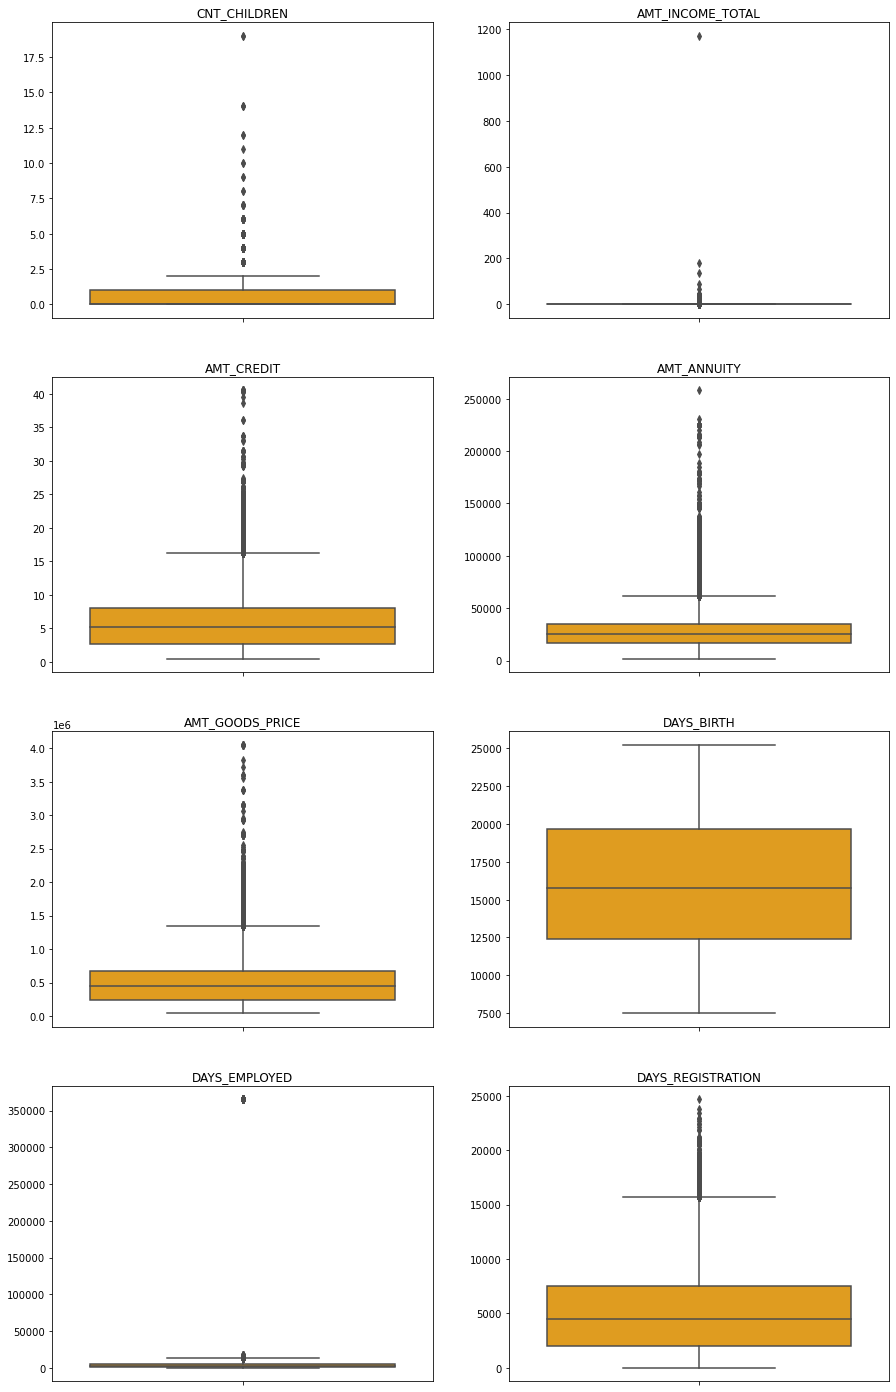

In [67]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = application[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**Insight:**

**It can be seen that in current application data**
   * **AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.**
   * **AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.**
   * **DAYS_BIRTH has no outliers which means the data available is reliable.**
   * **DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.**

In [68]:
application.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_MOBIL                          2
FLAG_OWN_REALTY                     2
NAME_CONTRACT_TYPE                  2
TARGET                              2
FLAG_DOCUMENT_3                     2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
WEEKDAY_APPR_PROCESS_START          7
EMPLOYEMENT_YEARS                   7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
AGE_GROUP                           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

In [69]:
#Checking the number of unique values each column possess to identify categorical columns

application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  object  
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

## 6. Converting Desired columns from Object to categorical column

In [70]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_R

In [71]:
#from the list, we have taken out the desired columns for conversion

categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

for col in categorical_columns:
    application[col] = pd.Categorical(application[col])

In [72]:
len(categorical_columns) # Converting total of 21 columns to categorical one

21

In [73]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  category
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

**Insight**
* **After imputing we have 53 columns and we will move ahead with Data Analysis on these columns**

# Dataset 2 - "previous_application.csv"

**Note: Dataframe has already be imported and understood.csv**

In [74]:
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

**Insight**

* **there are 37 columns and 1670214 rows.**
* **there columns having negative, postive values which includes days. fixing is required**

In [75]:
#checking how many null values are present in each of the columns in percentage
null_values(prev_application)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

In [76]:
#creating a variable p_null_col_50 for storing null columns having missing values more than 50%

p_null_col_50 = null_values(prev_application)[null_values(prev_application)>50]

In [77]:
p_null_col_50 # There only 4 columns with missing valus more than 50%

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
dtype: float64

In [78]:
#dropping null columns having missing values more than 50%

prev_application.drop(columns = p_null_col_50.index, inplace = True)

In [79]:
#creating a variable p_null_col_15 for storing null columns having missing values more than 15%

p_null_col_15 = null_values(prev_application)[null_values(prev_application)>15]

In [80]:
p_null_col_15

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [81]:
prev_application[p_null_col_15.index]

,NAME_TYPE_SUITE,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
0,NaN,365243.0,-37.0,-42.0,300.0,-42.0,0.0,17145.0,1730.430,12.0
1,Unaccompanied,365243.0,365243.0,365243.0,916.0,-134.0,1.0,607500.0,25188.615,36.0
2,"Spouse, partner",365243.0,365243.0,365243.0,59.0,-271.0,1.0,112500.0,15060.735,12.0
3,NaN,365243.0,-177.0,-182.0,-152.0,-482.0,1.0,450000.0,47041.335,12.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337500.0,31924.395,24.0
...,...,...,...,...,...,...,...,...,...,...
1670209,NaN,365243.0,-351.0,-358.0,362.0,-508.0,0.0,267295.5,14704.290,30.0
1670210,Unaccompanied,365243.0,-1297.0,-1304.0,-1274.0,-1604.0,0.0,87750.0,6622.020,12.0
1670211,"Spouse, partner",365243.0,-1181.0,-1187.0,-1187.0,-1457.0,0.0,105237.0,11520.855,10.0
1670212,Family,365243.0,-817.0,-825.0,-825.0,-1155.0,1.0,180000.0,18821.520,12.0


In [82]:
prev_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [83]:
# Listing down columns which are not needed
Unnecessary_prev = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

prev_application.drop(Unnecessary_prev,axis =1, inplace = True)

prev_application.shape

(1670214, 29)

In [84]:
# Imputing values "Unknown" as this a categorical column
prev_application["NAME_TYPE_SUITE"] = prev_application["NAME_TYPE_SUITE"].fillna("Unknown")

null_values(prev_application)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
NAME_PRODUCT_TYPE             0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
SK_ID_PREV                    0.00
NAME_PORTFOLIO                0.00
SK_ID_CURR                    0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE            0.00
NAME_GOODS_CATEGORY 

In [85]:
#Analying numerical columns using describe 

prev_application[p_null_col_15.index].describe()

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,342209.855039,81992.343838,76582.403064,33767.774054,13826.269337,0.332570,2.278473e+05,1.595512e+04,1.605408e+01
std,88916.115834,153303.516729,149647.415123,106857.034789,72444.869708,0.471134,3.153966e+05,1.478214e+04,1.456729e+01
min,-2922.000000,-2874.000000,-2889.000000,-2801.000000,-2892.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,365243.000000,-1270.000000,-1314.000000,-1242.000000,-1628.000000,0.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,365243.000000,-499.000000,-537.000000,-361.000000,-831.000000,0.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,365243.000000,-44.000000,-74.000000,129.000000,-411.000000,1.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,6.905160e+06,4.180581e+05,8.400000e+01


In [86]:
# To convert negative days to postive days creating a varaible "p_days_col"

p_days_col = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

prev_application[p_days_col].describe() # Analysis before conversion

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,-8.806797e+02,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838
std,7.790997e+02,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729
min,-2.922000e+03,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000
25%,-1.300000e+03,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000
50%,-5.810000e+02,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000
75%,-2.800000e+02,365243.000000,-411.000000,129.000000,-74.000000,-44.000000
max,-1.000000e+00,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


In [87]:
# Converting Negative days to positive days

prev_application[p_days_col] = abs(prev_application[p_days_col])

prev_application[p_null_col_15.index].describe() # analysing after conversion

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,342340.056543,83505.775017,78152.730207,35163.363265,15949.224065,0.332570,2.278473e+05,1.595512e+04,1.605408e+01
std,88413.495220,152484.418802,148833.342466,106405.950190,72007.270877,0.471134,3.153966e+05,1.478214e+04,1.456729e+01
min,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,365243.000000,447.000000,455.000000,257.000000,475.000000,0.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,365243.000000,1171.000000,1155.000000,741.000000,921.000000,0.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,365243.000000,2501.000000,2418.000000,1735.000000,1825.000000,1.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,6.905160e+06,4.180581e+05,8.400000e+01


In [88]:
#days group calculation e.g. 369 will be grouped as with in 2 years

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
prev_application['YEARLY_DECISION'] = pd.cut(prev_application['DAYS_DECISION'],bins,labels=slots)

**Insight:**
* **Almost 35% loan applicatants have applied for a new loan within 1 year of previous loan decision**

In [89]:
prev_application.nunique()

SK_ID_PREV                   1670214
SK_ID_CURR                    338857
NAME_CONTRACT_TYPE                 4
AMT_ANNUITY                   357959
AMT_APPLICATION                93885
AMT_CREDIT                     86803
AMT_GOODS_PRICE                93885
NAME_CASH_LOAN_PURPOSE            25
NAME_CONTRACT_STATUS               4
DAYS_DECISION                   2922
NAME_PAYMENT_TYPE                  4
CODE_REJECT_REASON                 9
NAME_TYPE_SUITE                    8
NAME_CLIENT_TYPE                   4
NAME_GOODS_CATEGORY               28
NAME_PORTFOLIO                     5
NAME_PRODUCT_TYPE                  3
CHANNEL_TYPE                       8
SELLERPLACE_AREA                2097
NAME_SELLER_INDUSTRY              11
CNT_PAYMENT                       49
NAME_YIELD_GROUP                   5
PRODUCT_COMBINATION               17
DAYS_FIRST_DRAWING              2838
DAYS_FIRST_DUE                  2892
DAYS_LAST_DUE_1ST_VERSION       2803
DAYS_LAST_DUE                   2873
D

In [90]:
null_values(prev_application)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
SK_ID_PREV                    0.00
CHANNEL_TYPE                  0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
SK_ID_CURR                    0.00
NAME_GOODS_CATEGORY           0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE  

#### Now dealing with continuos variables "AMT_ANNUITY", "AMT_GOODS_PRICE" 
#### To impute null values in continuous variables, we plotted the distribution of the columns and used
* **median if the distribution is skewed**
* **mode if the distribution pattern is preserved.**

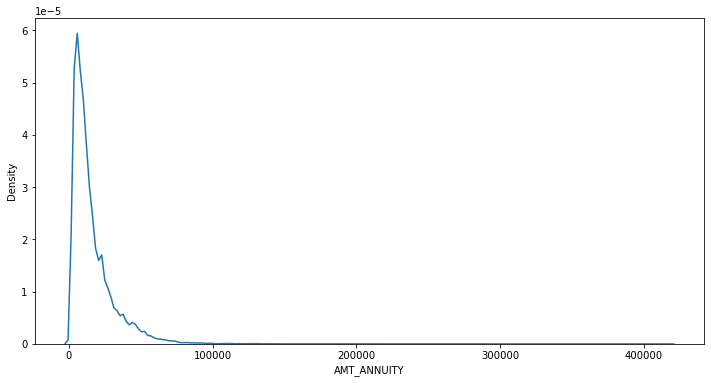

In [91]:
#plotting a kdeplot to understand distribution of "AMT_ANNUITY"

plt.figure(figsize=(12,6))
sns.kdeplot(prev_application['AMT_ANNUITY'])
plt.show()

**Insight:**
* **There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.**

In [92]:
#imputing missing values with median 

prev_application['AMT_ANNUITY'].fillna(prev_application['AMT_ANNUITY'].median(),inplace = True)

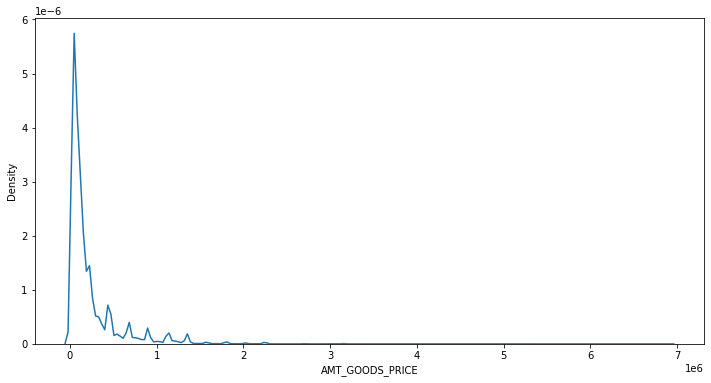

In [93]:
# Plotting kde plot for "AMT_GOODS_PRICE" to understand the distribution

plt.figure(figsize=(12,6))
sns.kdeplot(prev_application['AMT_GOODS_PRICE'])
plt.show()

* **There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.**

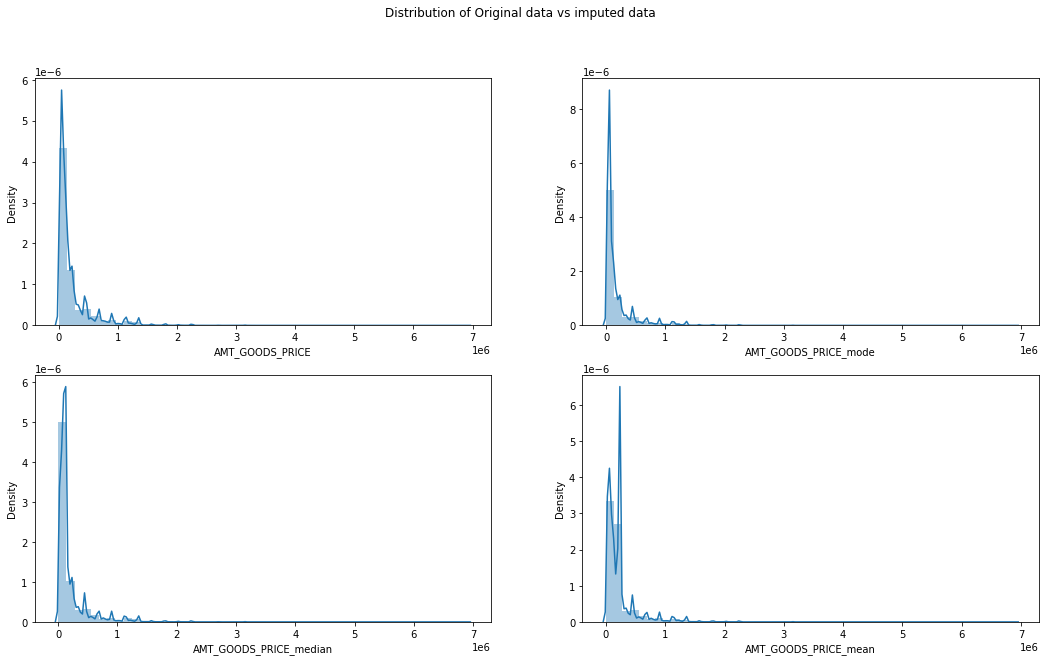

In [94]:
# Creating new dataframe for "AMT_GOODS_PRICE" with columns imputed with mode, median and mean

statsDF = pd.DataFrame() 
statsDF['AMT_GOODS_PRICE_mode'] = prev_application['AMT_GOODS_PRICE'].fillna(prev_application['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = prev_application['AMT_GOODS_PRICE'].fillna(prev_application['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = prev_application['AMT_GOODS_PRICE'].fillna(prev_application['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(prev_application['AMT_GOODS_PRICE'][pd.notnull(prev_application['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])


* **The original distribution is closer with the distribution of data imputed with mode in this case, thus will impute mode for missing values**

In [95]:
# Imputing null values with mode

prev_application['AMT_GOODS_PRICE'].fillna(prev_application['AMT_GOODS_PRICE'].mode()[0], inplace=True)

#### Imputing CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [96]:
#taking out values count for NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values.

prev_application.loc[prev_application['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [97]:
#imputing null values as 0

prev_application['CNT_PAYMENT'].fillna(0,inplace = True)

In [98]:
prev_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'YEARLY_DECISION'],
      dtype='object')

In [99]:
#Converting required categoical columns from Object to categorical 

p_catgorical_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in p_catgorical_col:
    prev_application[col] =pd.Categorical(prev_application[col])

## Finding outliers

In [100]:
prev_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,8.806797e+02,3.139511e+02,1.247621e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.790997e+02,7.127443e+03,1.447588e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,2.800000e+02,-1.000000e+00,0.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,5.810000e+02,3.000000e+00,1.000000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.300000e+03,8.200000e+01,1.600000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


* **from describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below**

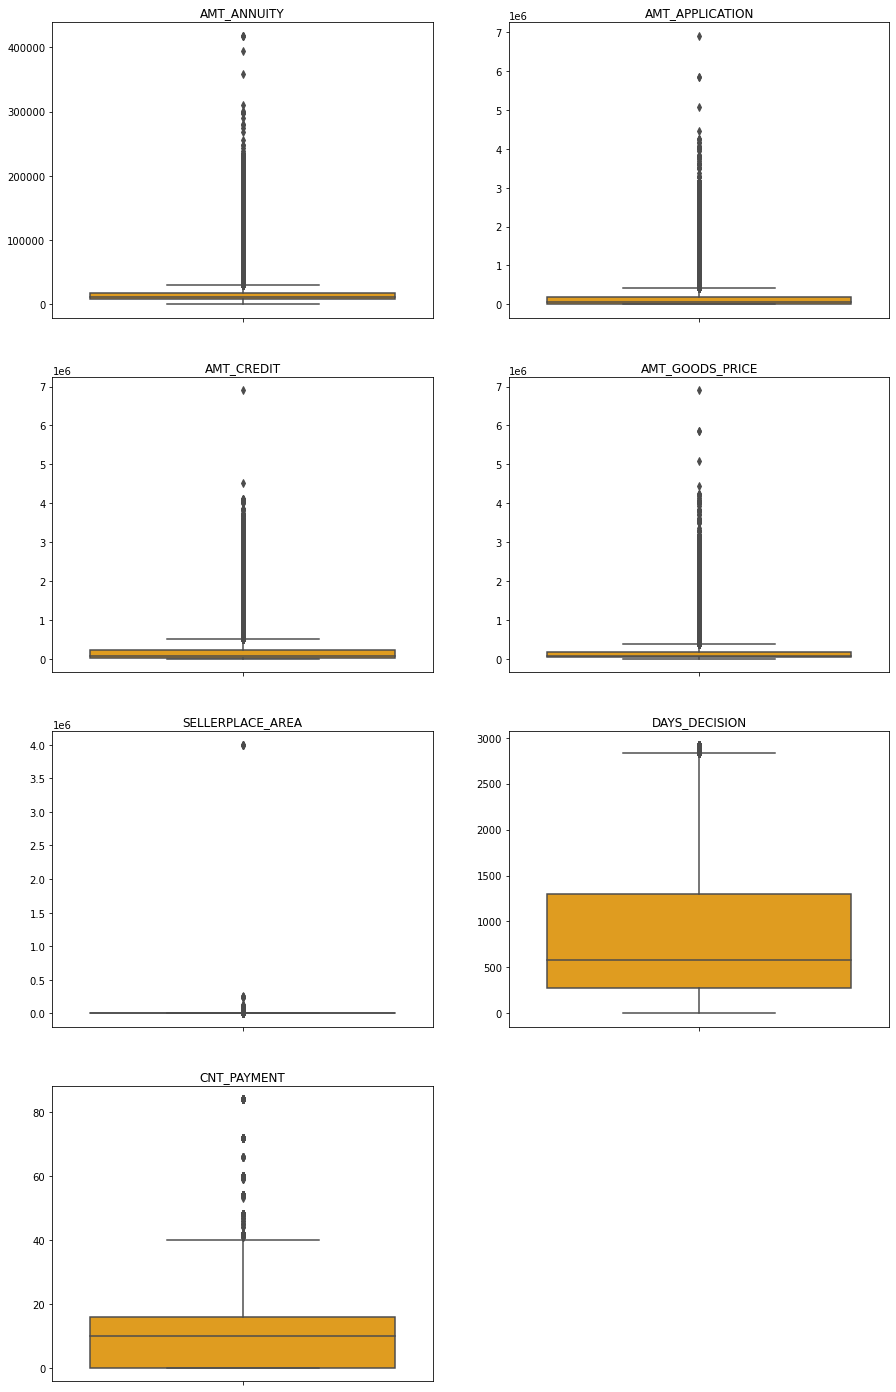

In [101]:
p_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(p_outlier_col, range(len(p_outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = prev_application[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**Insight:**

**It can be seen that in previous application data**
* **AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.**
* **CNT_PAYMENT has few outlier values.**
* **DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.**

## 7. Data Analysis Time

**Strategy:The data analysis flow has been planned in following way :**

* Imbalance in Data
* Categorical Data Analysis
* Categorical segmented Univariate Analysis
* Categorical Bi/Multivariate analysis
* Numeric Data Analysis
* Bi-furcation of databased based on TARGET data
* Correlation Matrix
* Numerical segmented Univariate Analysis
* Numerical Bi/Multivariate analysis

## 7.1 Imbalance Data

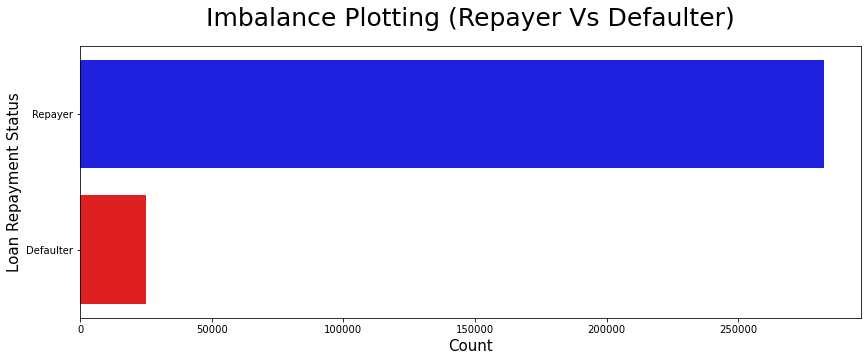

In [102]:
plt.figure(figsize= [14,5])
sns.barplot(y=["Repayer","Defaulter"], x = application["TARGET"].value_counts(), palette = ["blue","r"],orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (Repayer Vs Defaulter)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [103]:
#Ratio of imbalance percentage with respect to defaulter and repayer is given below 
repayer = round((application["TARGET"].value_counts()[0]/len(application)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((application["TARGET"].value_counts()[1]/len(application)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 (approx)".format(repayer/defaluter))

Repayer Percentage is 91.93%
Defaulter Percentage is 8.07%
Imbalance Ratio with respect to Repayer and Defaulter is given: 11.39/1 (approx)


## 7.2 Plotting Functions

### Important Function for Univariate analysis

Creating a function for plotting Variables to do univariate analysis.
This function will create two plots
1. Count plot of given column w.r.t TARGET column
2. Percentage of defaulters within that column

The function is taking 6 arguments
1. dataset : to put the dataset we want to use
2. col : column name for which we need to the analysis
3. target_col : column name for with which we will be comparing
4. ylog : to have y-axis in log10 terms, in case the plot is not readable
5. x_label_angle : to maintain the orientation of x-axis labels
6. h_layout : to give horizontal layout of the subplots

In [104]:
# Creating a function to find if the column is categorical or numerical 

def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"
    
# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)
        
        
    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})
        
        
        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)
        
        
# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))
              
        
# 1. Subplot 1: Count plot of the column
        
        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 20)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
        
# 2. Subplot 2: Percentage of defaulters within the column
        
        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)    
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
            
            
# If the plot is not readable, use the log scale
                
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})

        
        plt.show()

In [105]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()
    

In [123]:
# function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)    
    plt.ylabel(y,fontsize = 15)    
    plt.title(col,fontsize = 20) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()
    

In [106]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=20) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()

In [107]:
# Function to plot point plots 

def pointplot(df,hue,x,y):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)

In [108]:
# storing numnercial and categorical columns as list in belows varibles

cat_col = list(application.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(application.select_dtypes(["int","float"]).columns)  #N Numerical Column list

## 7.3 Categorical Variables Analysis

### 7.3.1 Segmented Univariate Analysis

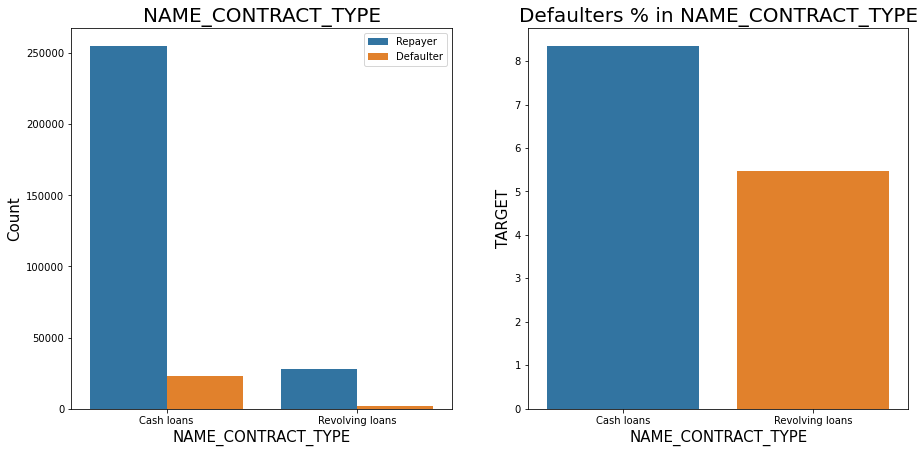

In [109]:
#1 Checking the contract type based on loan repayment status
univariate(application,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

**Inferences: Contract type**
* **Revolving loans are just a small fraction (10%) from the total number of loans**
* **Around 8-9% Cash loan applicants and 5-6% Revolving loan applicant are in defaulters**

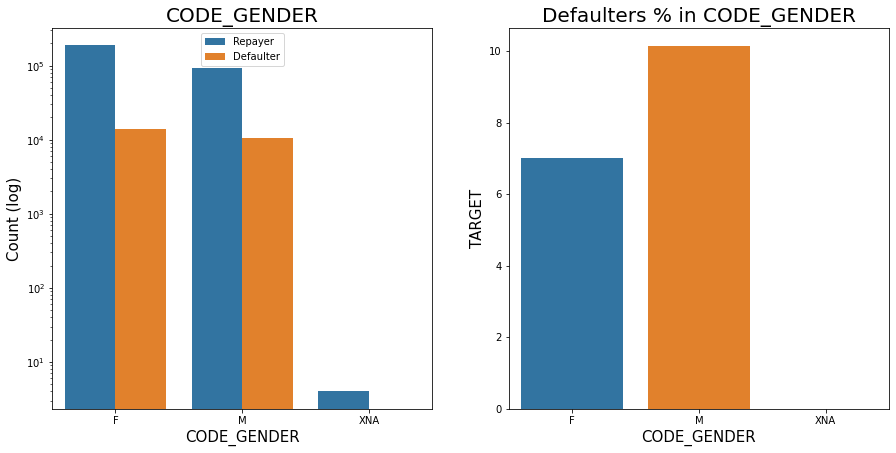

In [110]:
#2 Checking the type of Gender on loan repayment status
univariate(application,"CODE_GENDER","TARGET",True,False,True)

**Inferences: Gender Type**
* **The number of female clients is almost double the number of male clients.**
* **Based on the percentage of defaulted credits, males have a higher chance of not returning their loans about 10%, comparing with women about 7%**

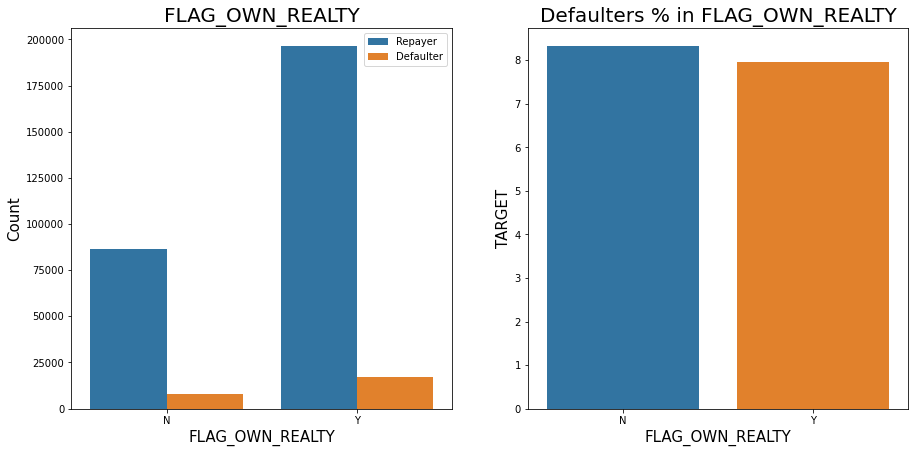

In [111]:
#3 Checking if owning a real estate is related to loan repayment status
univariate(application,"FLAG_OWN_REALTY","TARGET",False,False,True)

**Inferences:**
* **The clients who own real estate are more than double of the ones that don't own.**
* **The defaulting rate of both categories are around the same (~8%). Thus we can infer that there is no correlation between owning a reality and defaulting the loan.**

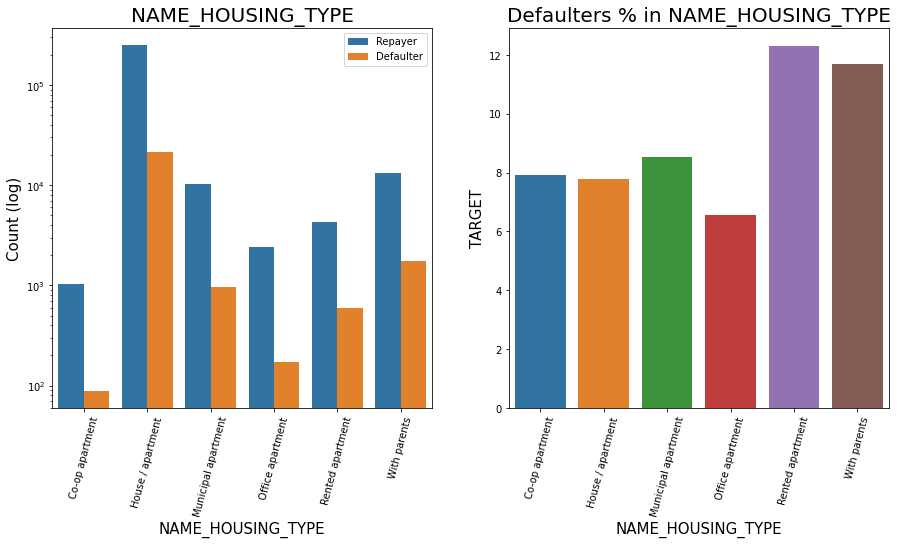

In [112]:
#4 Analyzing Housing Type based on loan repayment status
univariate(application,"NAME_HOUSING_TYPE","TARGET",True,True,True)

**Inferences: Applicant House type**
* **Majority of people live in House/apartment**
* **People living in office apartments have lowest default rate**
* **People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting**

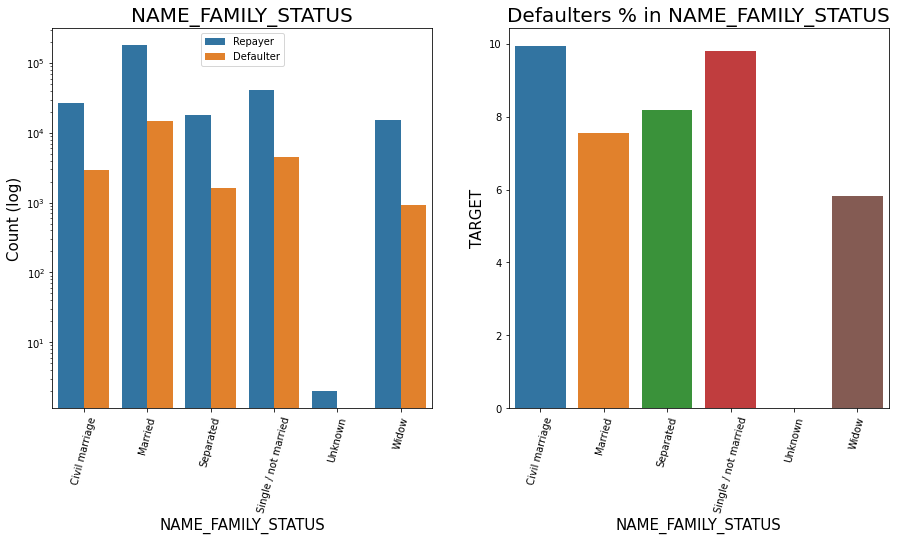

In [113]:
#5 Analyzing Family status based on loan repayment status
univariate(application,"NAME_FAMILY_STATUS","TARGET",True,True,True)

**Inferences:**
* **Most of the people who have taken loan are married, followed by Single/not married and civil marriage**
* **In Percentage of defaulters, Civil marriage has the highest percent around (10%) and widow has the lowest around 6% (exception being Unknown).**

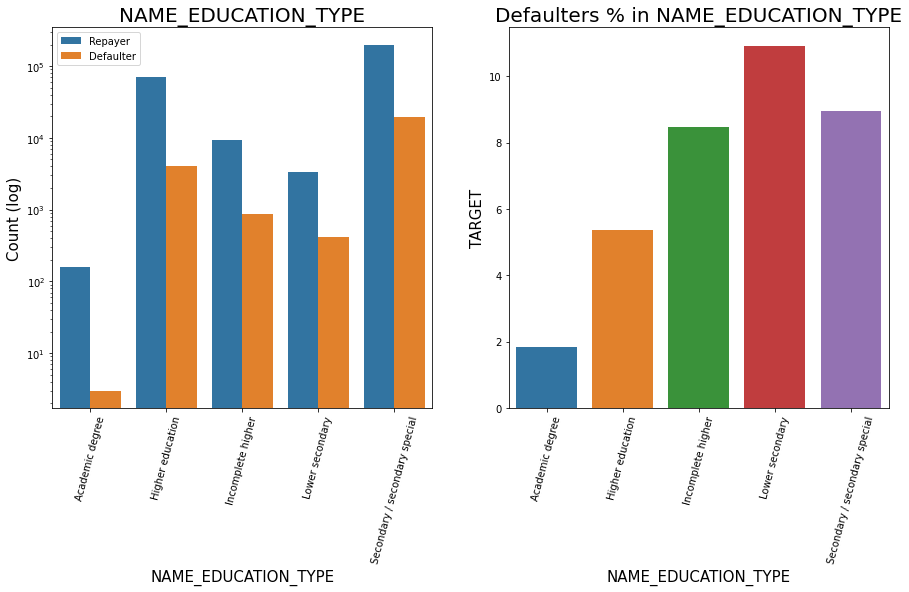

In [114]:
#6 Analyzing Education Type based on loan repayment status
univariate(application,"NAME_EDUCATION_TYPE","TARGET",True,True,True)

**Inferences: Education Type**
* **Majority of clients have Secondary/secondary special education, followed by clients with Higher education.**
* **Very few clients have an academic degree**
* **Lower secondary category have highest rate of defaulting around 11%.**
* **People with Academic degree are least likely to default.**

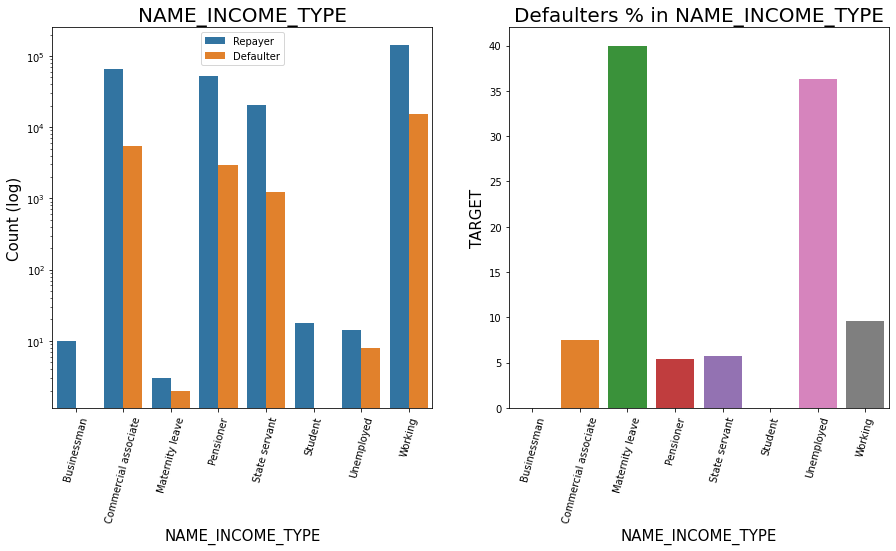

In [115]:
#7 Analyzing Income Type based on loan repayment status
univariate(application,"NAME_INCOME_TYPE","TARGET",True,True,True)

**Inferences:**
* **Most of applicants for loans income type is Working, followed by Commercial associate, Pensioner and State servant.**
* **The applicants who are on Maternity leave have defaulting percentage of 40% which is the highest, followed by Unemployed (37%). The rest under average around 10% defaultees.**
* **Student and Businessmen though less in numbers, do not have default record. Safest two categories for providing loan.**

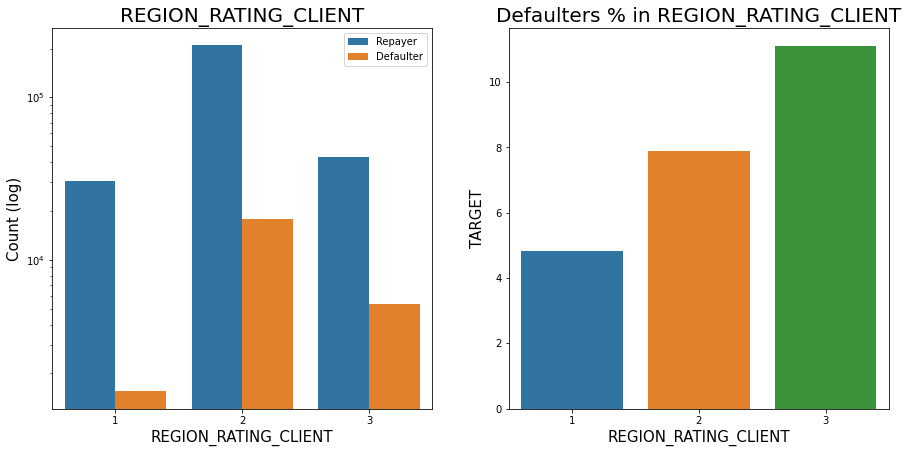

In [116]:
#8 Analyzing Region rating where applicant lives based on loan repayment status
univariate(application,"REGION_RATING_CLIENT","TARGET",True,False,True)

**Inferences:Client Region Rating**
* **Most of the applicants are living in Region with Rating 2 place.**
* **Region Rating 3 has the highest default rate (11%)**
* **Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans**

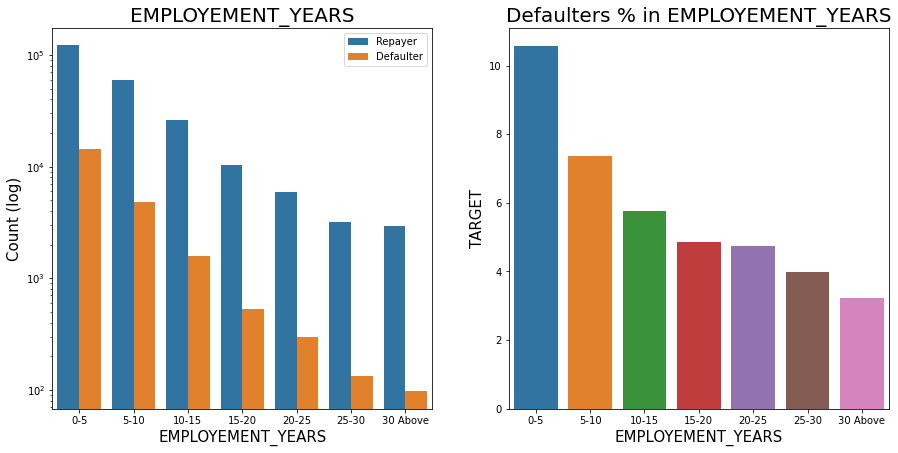

In [117]:
#9 Analyzing Employment_Year based on loan repayment status
univariate(application,"EMPLOYEMENT_YEARS","TARGET",True,False,True)

**Inferences: Employment in Years**
* **Majority of the applicants having working experience between 0-5 years are defaultees. The defaulting rating of this group is also the highest which is around 10%**
* **With increase of employment year, defaulting rate is radually decreasing.**
* **with people having 40+ year experience have less than 1% default rate**

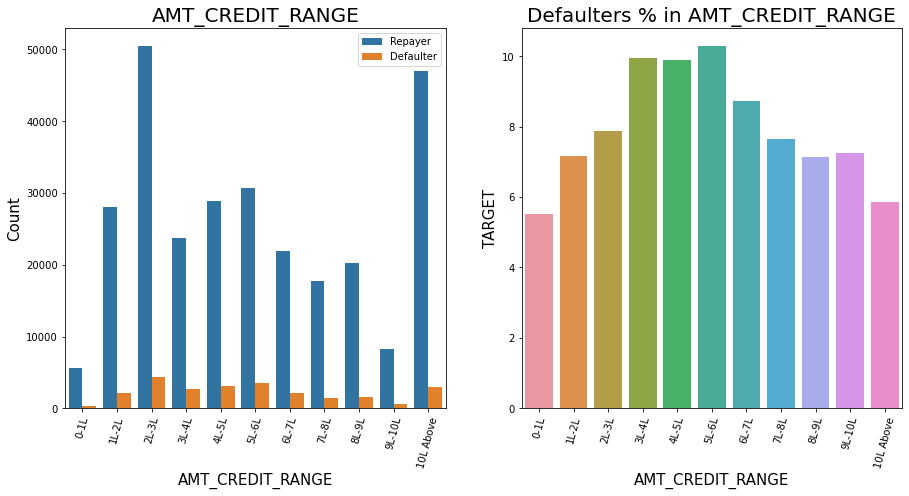

In [118]:
#12 Analyzing Amount_Credit based on loan repayment status

univariate(application,"AMT_CREDIT_RANGE","TARGET",False,True,True)

**Inferences: Loan Amount**
* **there are high number of applicants have loan in range of 2-3 Lakhs followed by 10 Lakh above range**
* **People who get loan for 3-6 Lakhs have most number of defaulters than other loan range.**

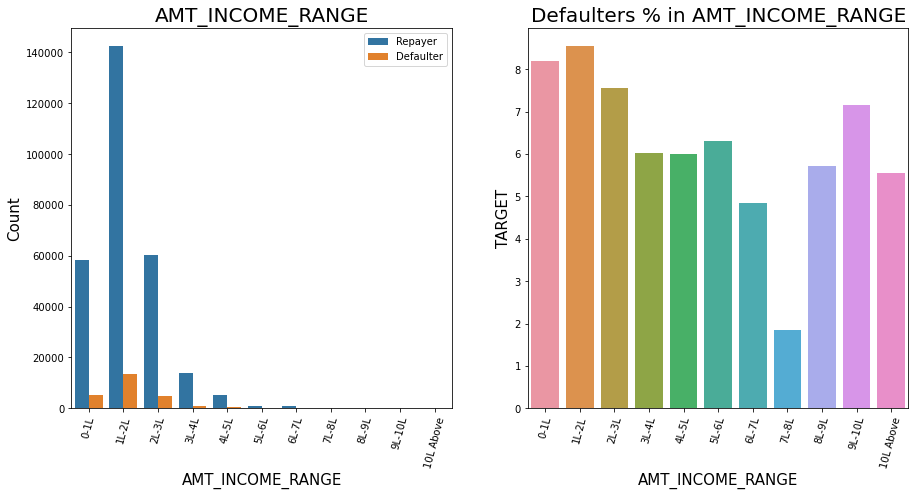

In [120]:
#13  Analyzing Amount_Income Range based on loan repayment status

univariate(application,"AMT_INCOME_RANGE","TARGET",False,True,True)

**Inferences: Applicant Income**
* **Majority of the applications have Income total less than 3 Lakhs.**
* **Application with Income less than 3 Lakhs has high probability of defaulting**
* **Applicant with Income 7-8 Lakhas are less likely to default.**

### 7.3.2 Categorical Bivariate or Multivariate Analysis

In [124]:
application.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


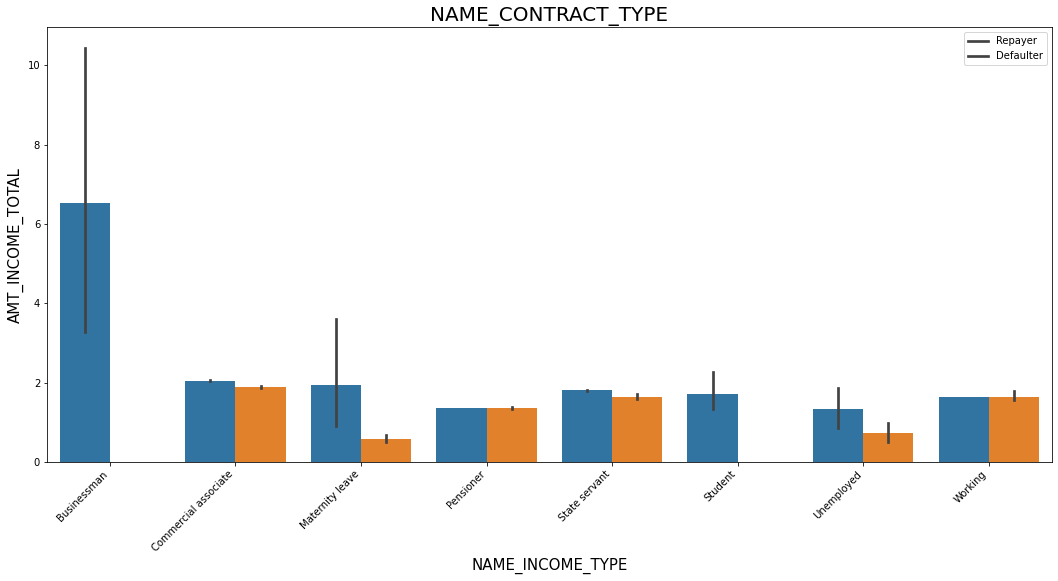

In [125]:
# Income type vs Income Amount Range on a Seaborn Barplot
bivariate_c("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",application,"TARGET",(18,8),['Repayer','Defaulter'])

**Inferences:**
* **It can be seen that Businessman income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a Businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs**

### 7.3.3 Numeric Variables Analysis

**Bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis**

In [127]:
#Listing all the columnns of dataframe "appl_data"
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_R

In [128]:
# bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = application.loc[application['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = application.loc[application['TARGET']==1, cols_for_correlation]

In [129]:
len(cols_for_correlation)

41

In [130]:
# Getting  top 10 correlation for the Repayers dataframe

corr_repayer = Repayer_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
43,AMT_ANNUITY,AMT_CREDIT,0.771309
131,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
42,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
63,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
152,DAYS_REGISTRATION,DAYS_BIRTH,0.333151
174,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276663
173,DAYS_ID_PUBLISH,DAYS_BIRTH,0.271314


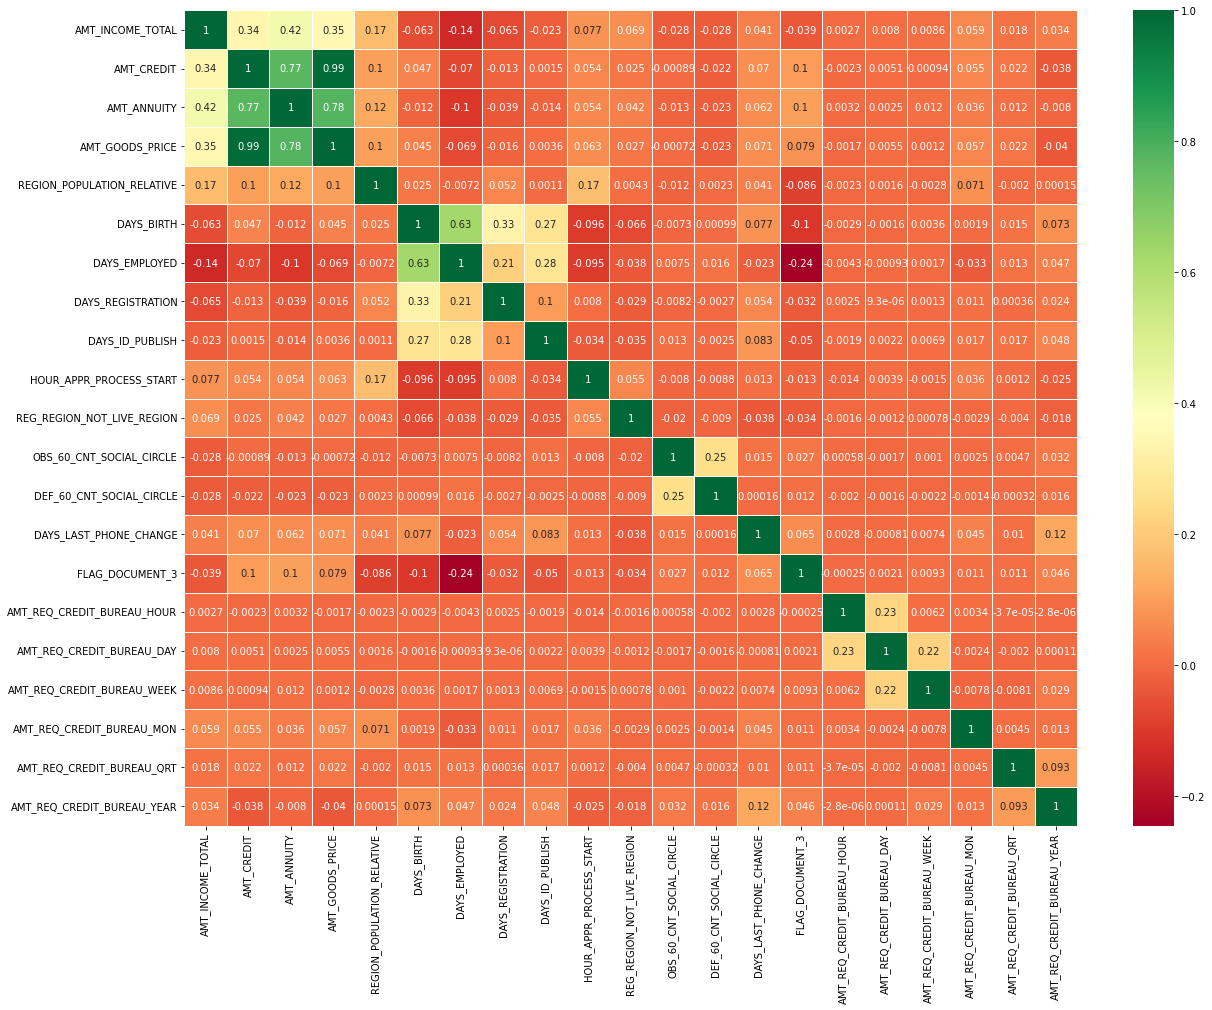

In [131]:
#plotting heatmap to see linear correlation amoung Repayers 

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

**Inferences:**
**Correlating factors amongst repayers**

**1. Credit amount is highly correlated with:**
* **Goods Price Amount**
* **Loan Annuity**
* **Total Income**

**2. We can also see that repayers have high correlation in number of days employed.**

In [132]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
43,AMT_ANNUITY,AMT_CREDIT,0.752195
131,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
152,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
300,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.272169
263,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264159
173,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863
351,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.247511
174,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090


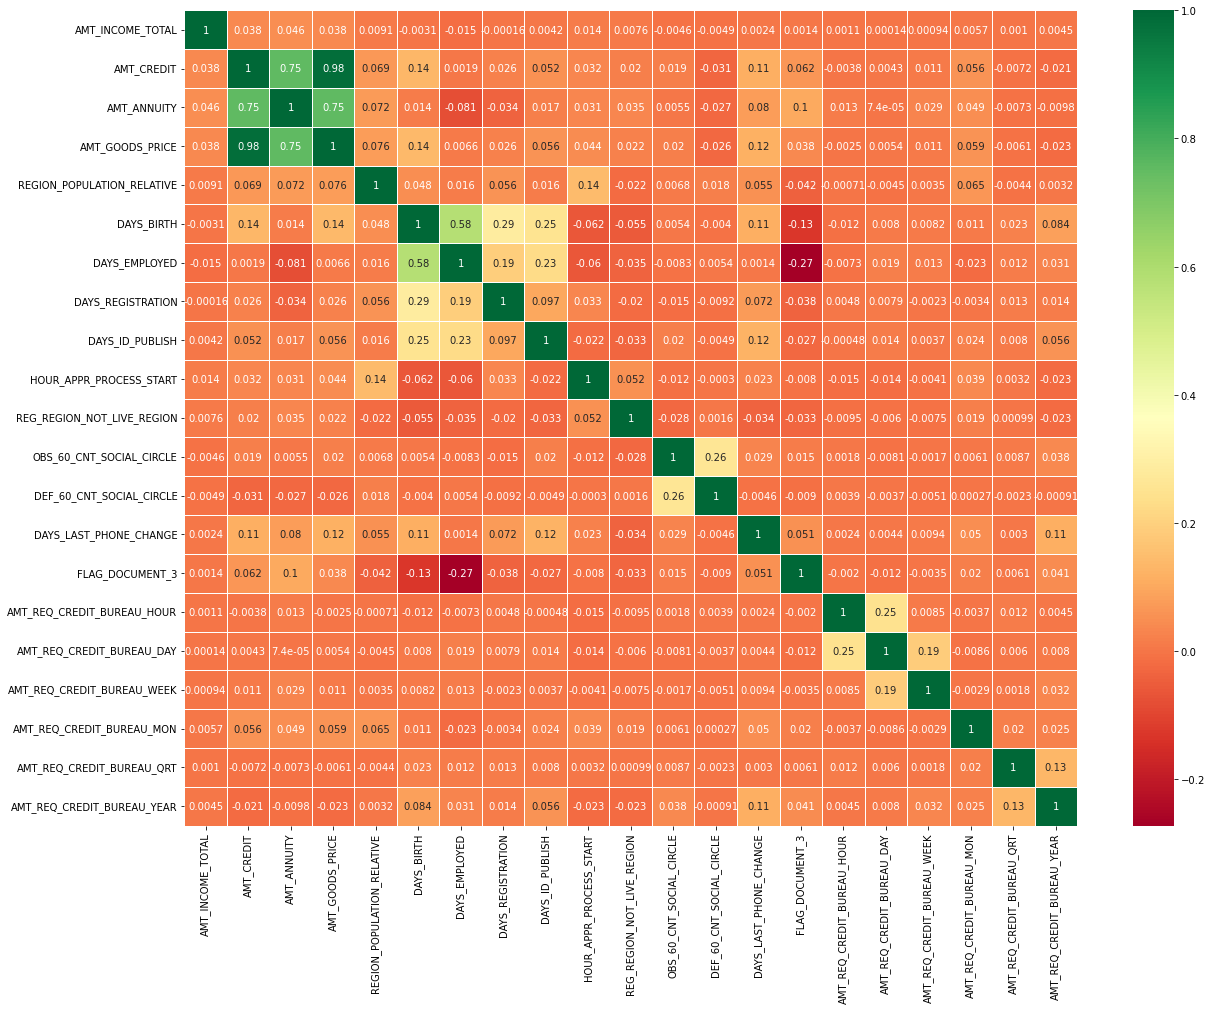

In [133]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

**Inferences: Correlating factors amongst repayers**
* **Credit amount is highly correlated with good price amount which is same as repayers.**
* **Loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)**
* **We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).**
* **There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.**
* **Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.**
* **There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)**

## 8. Merged Dataframes Analysis

In [139]:
# merge both the dataframe on SK_ID_CURR with Inner Joins
loan = pd.merge(application, prev_application, how='inner', on='SK_ID_CURR')
loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,YEARLY_DECISION
0,100002,1,Cash loans,M,Y,0,2.025,4.065975,24700.5,351000.0,...,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,2
1,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,1129500.0,...,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,3
2,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,1129500.0,...,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0,3
3,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,1129500.0,...,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0,7
4,100004,0,Revolving loans,M,Y,0,0.675,1.350000,6750.0,135000.0,...,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0,3


In [140]:
# checking the columns and column types of the dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 81 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_REALTY              1413701 non-null  category
 5   CNT_CHILDREN                 1413701 non-null  category
 6   AMT_INCOME_TOTAL             1413701 non-null  float64 
 7   AMT_CREDIT_x                 1413701 non-null  float64 
 8   AMT_ANNUITY_x                1413608 non-null  float64 
 9   AMT_GOODS_PRICE_x            1412493 non-null  float64 
 10  NAME_TYPE_SUITE_x            1410175 non-null  category
 11  NAME_INCOME_TYPE             1413701 non-null  category
 12  NAME_EDUCATION_TYPE         

In [141]:
# Bisecting the "loan_df" dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan[loan['TARGET']==0] # Repayers
L1 = loan[loan['TARGET']==1] # Defaulters

**Plotting Contract Status vs purpose of the loan**

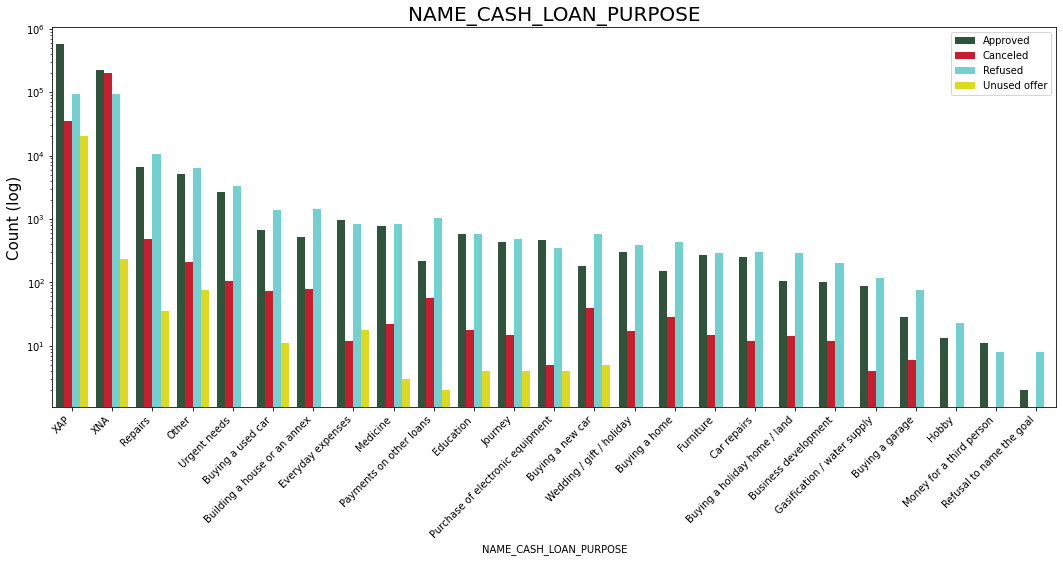

In [142]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

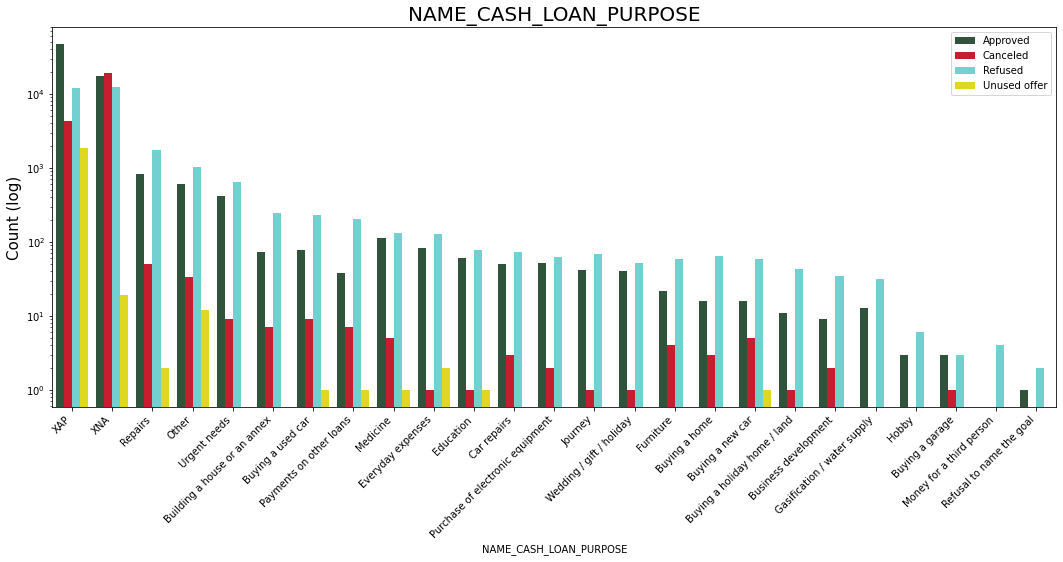

In [143]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

**Inferences:**
* **Loan purpose has high number of unknown values (XAP, XNA)**
* **Loan taken for the purpose of Repairs looks to have highest default rate**
* **Huge number application have been rejected by bank or refused by client which are applied for Repair or Other. from this we can infer that repair is considered high risk by bank. Also, either they are rejected or bank offers loan on high interest rate which is not feasible by the clients and they refuse the loan.**

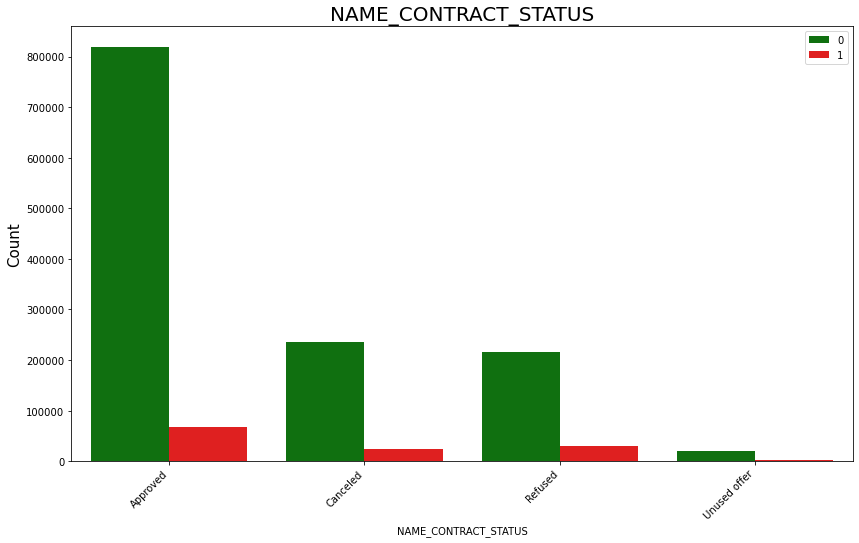

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%

In [144]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss

univariate_c_merged("NAME_CONTRACT_STATUS",loan,"TARGET",['g','r'],False,(14,8))
r = loan.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1

**Inferences:**
* **90% of the previously cancelled client have actually repayed the loan. Revising the interest rates would increase business opportunity for these clients**
* **88% of the clients who have been previously refused a loan has payed back the loan in current case.**
* **Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.**

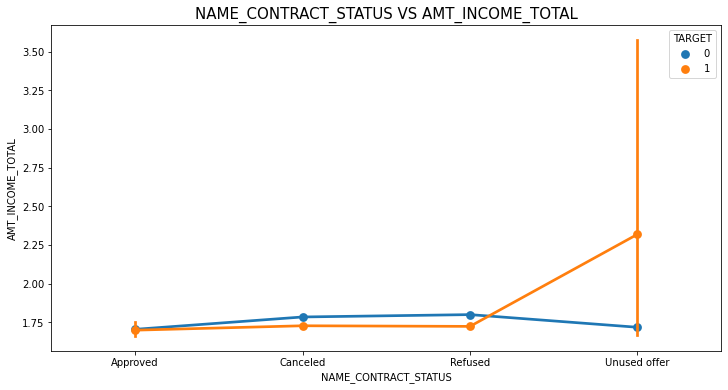

In [146]:
# plotting the relationship between income total and contact status

pointplot(loan,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

**Inferences:**
* **The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others**

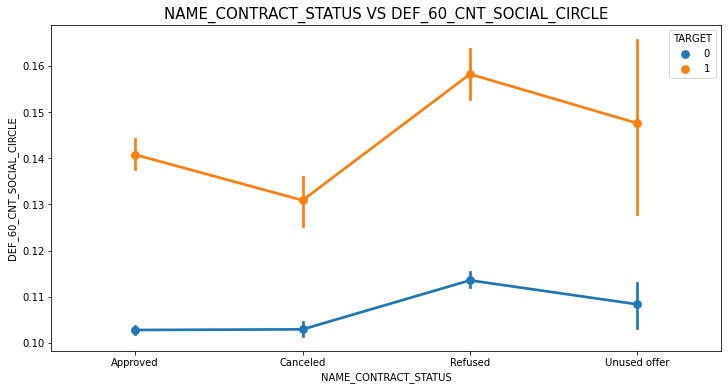

In [147]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

pointplot(loan,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

**Inferences:**
* **Clients who have average of 0.13 or higher their DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and thus analysing client's social circle could help in disbursment of the loan.**

## 9. Conclusions

### After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not. 

### The analysis is consised as below with the contributing factors and categorization:

### A. Decisive Factor whether an applicant will be Repayer:
1. **NAME_EDUCATION_TYPE: Academic degree has less defaults.**
2. **NAME_INCOME_TYPE: Student and Businessmen have no defaults.**
3. **REGION_RATING_CLIENT: RATING 1 is safer.**
4. **ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%**
5. **DAYS_BIRTH: People above age of 50 have low probability of defaulting**
6. **DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate**
7. **AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default**
8. **NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.**
9. **CNT_CHILDREN: People with zero to two children tend to repay the loans.**

### B. Decisive Factor whether an applicant will be Defaulter:
1. **CODE_GENDER: Men are at relatively higher default rate**
2. **NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.**
3. **NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education**
4. **NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.**
5. **REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.**
6. **OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as their default rate is huge.**
7. **ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.**
8. **DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting**
9. **DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.**
10. **CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.**
11. **AMT_GOODS_PRICE: When the credit amount goes beyond 3lakhs, there is an increase in defaulters.**

### C. Factors that Loan can be given on Condition of High Interest rate to mitigate any default risk leading to business loss:


1. **NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.**
2. **AMT_CREDIT: People who get loan for 3-6 Lakhs tend to default more than others and hence having higher interest specifically for this credit range would be ideal.**
3. **AMT_INCOME: Since 90% of the applications have Income total less than 3Lakhs and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.**
4. **CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.**
5. **NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.**

### D. Suggestions:
* **90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.**
* **88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.**